# **AI TECH INSTITUTE** · *Intermediate AI & Data Science*
### Week 02 · Notebook 01 — Visual Design Principles & Grammar of Graphics
**Instructor:** Amir Charkhi  |  **Goal:** Master the fundamentals of effective data visualization.

> Format: theory → implementation → best practices → real-world application.


---
## Why Visualization Matters
The human brain processes visual information 60,000x faster than text. Let's learn to leverage this.

In [2]:
# Essential imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# Set style defaults
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')
pd.set_option('display.max_columns', None)

print("Ready to visualize! 📊")

Ready to visualize! 📊


## 1. Load Real-World Dataset: Australian Housing Market

In [3]:
# Generate realistic Australian housing market data
np.random.seed(42)
n_properties = 5000

# Cities with realistic price distributions
cities = ['Sydney', 'Melbourne', 'Brisbane', 'Perth', 'Adelaide', 'Hobart', 'Darwin', 'Canberra']
city_weights = [0.25, 0.22, 0.15, 0.12, 0.10, 0.06, 0.04, 0.06]

# Generate data
housing_data = pd.DataFrame({
    'property_id': range(1, n_properties + 1),
    'city': np.random.choice(cities, n_properties, p=city_weights),
    'suburb': ['Suburb_' + str(i % 50) for i in range(n_properties)],
    'property_type': np.random.choice(['House', 'Apartment', 'Townhouse', 'Villa'], 
                                     n_properties, p=[0.45, 0.35, 0.15, 0.05]),
    'bedrooms': np.random.choice([1, 2, 3, 4, 5], n_properties, p=[0.1, 0.25, 0.35, 0.25, 0.05]),
    'bathrooms': np.random.choice([1, 2, 3], n_properties, p=[0.4, 0.45, 0.15]),
    'car_spaces': np.random.choice([0, 1, 2, 3], n_properties, p=[0.15, 0.35, 0.40, 0.10]),
    'land_size': np.random.lognormal(6, 0.8, n_properties),
    'building_size': np.random.lognormal(5, 0.6, n_properties),
    'year_built': np.random.normal(1995, 20, n_properties).astype(int).clip(1950, 2024),
    'distance_cbd': np.random.exponential(15, n_properties),
    'distance_school': np.random.exponential(2, n_properties),
    'distance_station': np.random.exponential(3, n_properties),
    'crime_rate': np.random.exponential(5, n_properties),
    'sale_date': pd.date_range(end='2024-12-31', periods=n_properties),
})

# Add price based on features (realistic model)
base_price = {
    'Sydney': 1200000, 'Melbourne': 950000, 'Brisbane': 750000, 'Perth': 650000,
    'Adelaide': 600000, 'Hobart': 550000, 'Darwin': 600000, 'Canberra': 850000
}

housing_data['price'] = housing_data.apply(lambda row: 
    base_price[row['city']] * 
    (1 + 0.15 * row['bedrooms']) * 
    (1 + 0.1 * row['bathrooms']) *
    (1 - 0.01 * row['distance_cbd']) *
    (1 + np.random.normal(0, 0.15)), axis=1
)

# Add derived features
housing_data['price_per_sqm'] = housing_data['price'] / housing_data['building_size']
housing_data['age'] = 2024 - housing_data['year_built']
housing_data['quarter'] = housing_data['sale_date'].dt.quarter
housing_data['month'] = housing_data['sale_date'].dt.month

print(f"Dataset shape: {housing_data.shape}")
print("\nFirst few rows:")
print(housing_data.head())
print("\nData types:")
print(housing_data.dtypes)

Dataset shape: (5000, 20)

First few rows:
   property_id       city    suburb property_type  bedrooms  bathrooms  \
0            1  Melbourne  Suburb_0         House         3          2   
1            2   Canberra  Suburb_1     Apartment         2          2   
2            3      Perth  Suburb_2     Townhouse         2          2   
3            4   Brisbane  Suburb_3         House         3          1   
4            5     Sydney  Suburb_4     Townhouse         3          1   

   car_spaces   land_size  building_size  year_built  distance_cbd  \
0           2  563.487485      47.540102        1965      7.487102   
1           1  434.715657     199.567613        2008     41.373288   
2           1  238.044705      62.230882        2024     15.322877   
3           2  404.722241     159.342301        2005     27.254424   
4           1  227.805171     255.390690        2024     14.529193   

   distance_school  distance_station  crime_rate  sale_date         price  \
0         1.81

## 2. Visual Encoding Principles

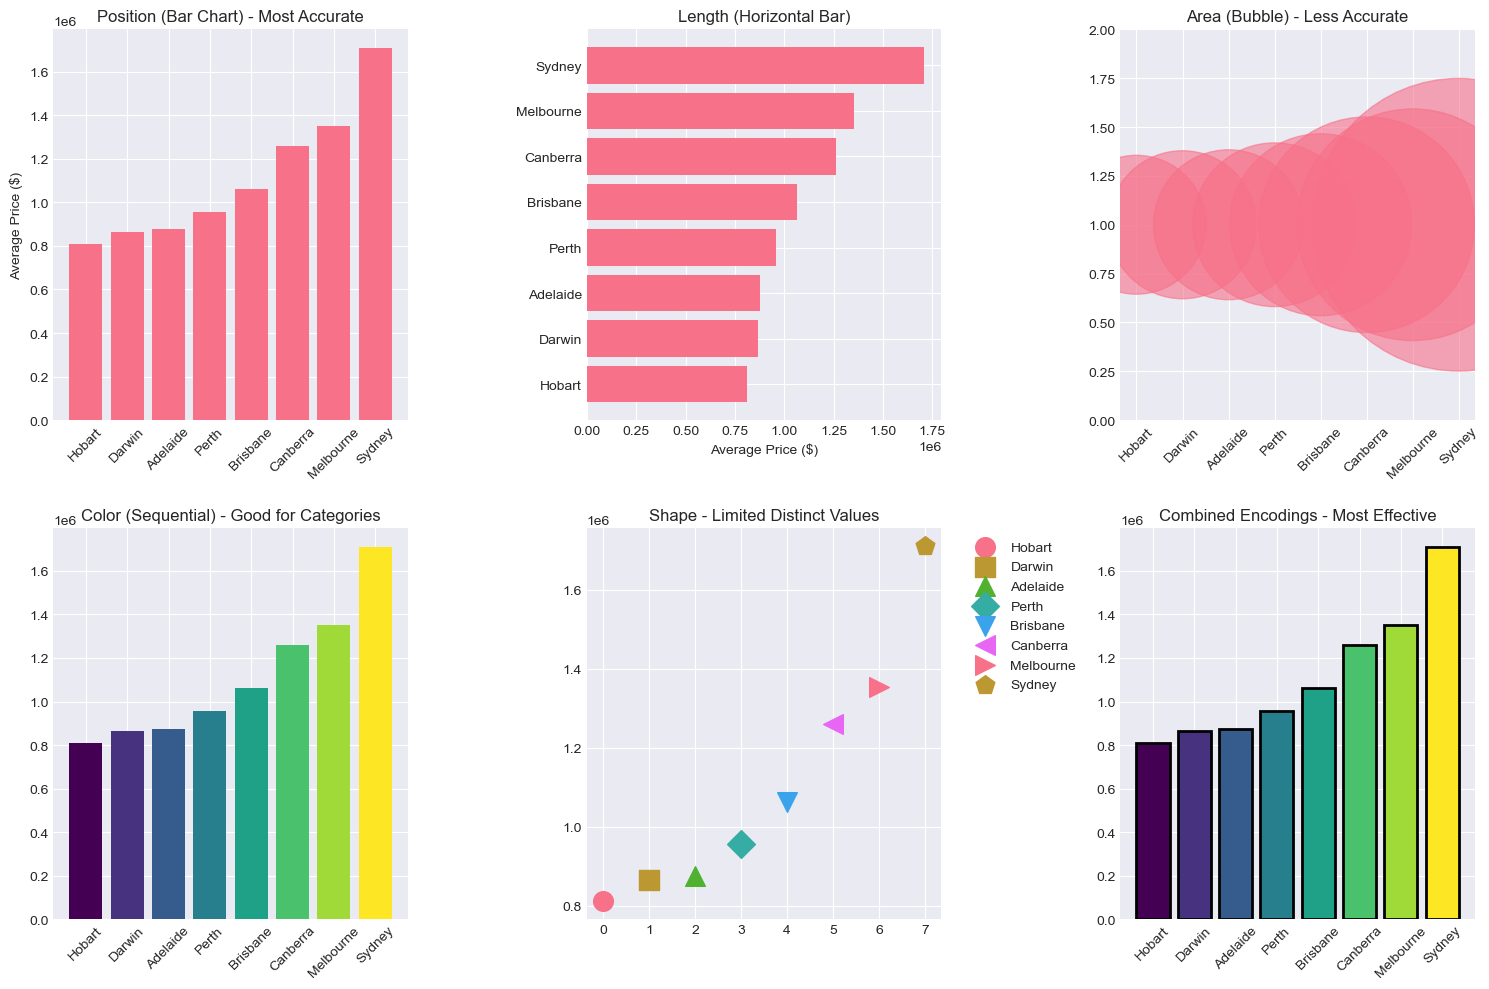

Key Insight: Position and length are most accurate for quantitative comparisons.
Color works well for categories, area/volume can be misleading.


In [4]:
# Demonstrate pre-attentive attributes
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Position - most accurate
sample_data = housing_data.groupby('city')['price'].mean().sort_values()
axes[0, 0].bar(range(len(sample_data)), sample_data.values)
axes[0, 0].set_xticks(range(len(sample_data)))
axes[0, 0].set_xticklabels(sample_data.index, rotation=45)
axes[0, 0].set_title('Position (Bar Chart) - Most Accurate')
axes[0, 0].set_ylabel('Average Price ($)')

# Length
axes[0, 1].barh(range(len(sample_data)), sample_data.values)
axes[0, 1].set_yticks(range(len(sample_data)))
axes[0, 1].set_yticklabels(sample_data.index)
axes[0, 1].set_title('Length (Horizontal Bar)')
axes[0, 1].set_xlabel('Average Price ($)')

# Area - less accurate
sizes = (sample_data.values / sample_data.values.min() * 100) ** 2
axes[0, 2].scatter(range(len(sample_data)), [1]*len(sample_data), s=sizes, alpha=0.6)
axes[0, 2].set_xticks(range(len(sample_data)))
axes[0, 2].set_xticklabels(sample_data.index, rotation=45)
axes[0, 2].set_title('Area (Bubble) - Less Accurate')
axes[0, 2].set_ylim(0, 2)

# Color - categorical
colors = plt.cm.viridis(np.linspace(0, 1, len(sample_data)))
axes[1, 0].bar(range(len(sample_data)), sample_data.values, color=colors)
axes[1, 0].set_xticks(range(len(sample_data)))
axes[1, 0].set_xticklabels(sample_data.index, rotation=45)
axes[1, 0].set_title('Color (Sequential) - Good for Categories')

# Shape - limited distinct values
markers = ['o', 's', '^', 'D', 'v', '<', '>', 'p']
for i, (city, value) in enumerate(sample_data.items()):
    axes[1, 1].scatter(i, value, s=200, marker=markers[i], label=city)
axes[1, 1].set_title('Shape - Limited Distinct Values')
axes[1, 1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Combination - most effective
axes[1, 2].bar(range(len(sample_data)), sample_data.values, color=colors, 
               edgecolor='black', linewidth=2)
axes[1, 2].set_xticks(range(len(sample_data)))
axes[1, 2].set_xticklabels(sample_data.index, rotation=45)
axes[1, 2].set_title('Combined Encodings - Most Effective')

plt.tight_layout()
plt.show()

print("Key Insight: Position and length are most accurate for quantitative comparisons.")
print("Color works well for categories, area/volume can be misleading.")

**Exercise 1 — Chart Selection Matrix (medium)**  
Create a function that recommends the best chart type based on data characteristics.


<details>
<summary><b>Solution</b></summary>

```python
def recommend_chart(data_type_x, data_type_y, purpose, n_categories=None):
    """
    Recommend chart type based on data and purpose.
    
    data_type: 'categorical', 'numerical', 'temporal'
    purpose: 'comparison', 'distribution', 'relationship', 'composition', 'trend'
    """
    recommendations = {
        ('categorical', 'numerical', 'comparison'): 'Bar Chart',
        ('temporal', 'numerical', 'trend'): 'Line Chart',
        ('numerical', 'numerical', 'relationship'): 'Scatter Plot',
        ('categorical', 'categorical', 'composition'): 'Heatmap',
        ('numerical', None, 'distribution'): 'Histogram or Box Plot',
        ('categorical', 'numerical', 'distribution'): 'Violin Plot',
    }
    
    # Special cases
    if purpose == 'composition' and n_categories and n_categories <= 5:
        return 'Pie Chart (use sparingly)'
    elif purpose == 'composition' and n_categories and n_categories > 5:
        return 'Treemap or Stacked Bar'
    
    return recommendations.get((data_type_x, data_type_y, purpose), 
                               'Consider multiple coordinated views')

# Test
print(recommend_chart('categorical', 'numerical', 'comparison'))
print(recommend_chart('temporal', 'numerical', 'trend'))
print(recommend_chart('numerical', 'numerical', 'relationship'))
```
</details>

## 3. Color Theory and Accessibility

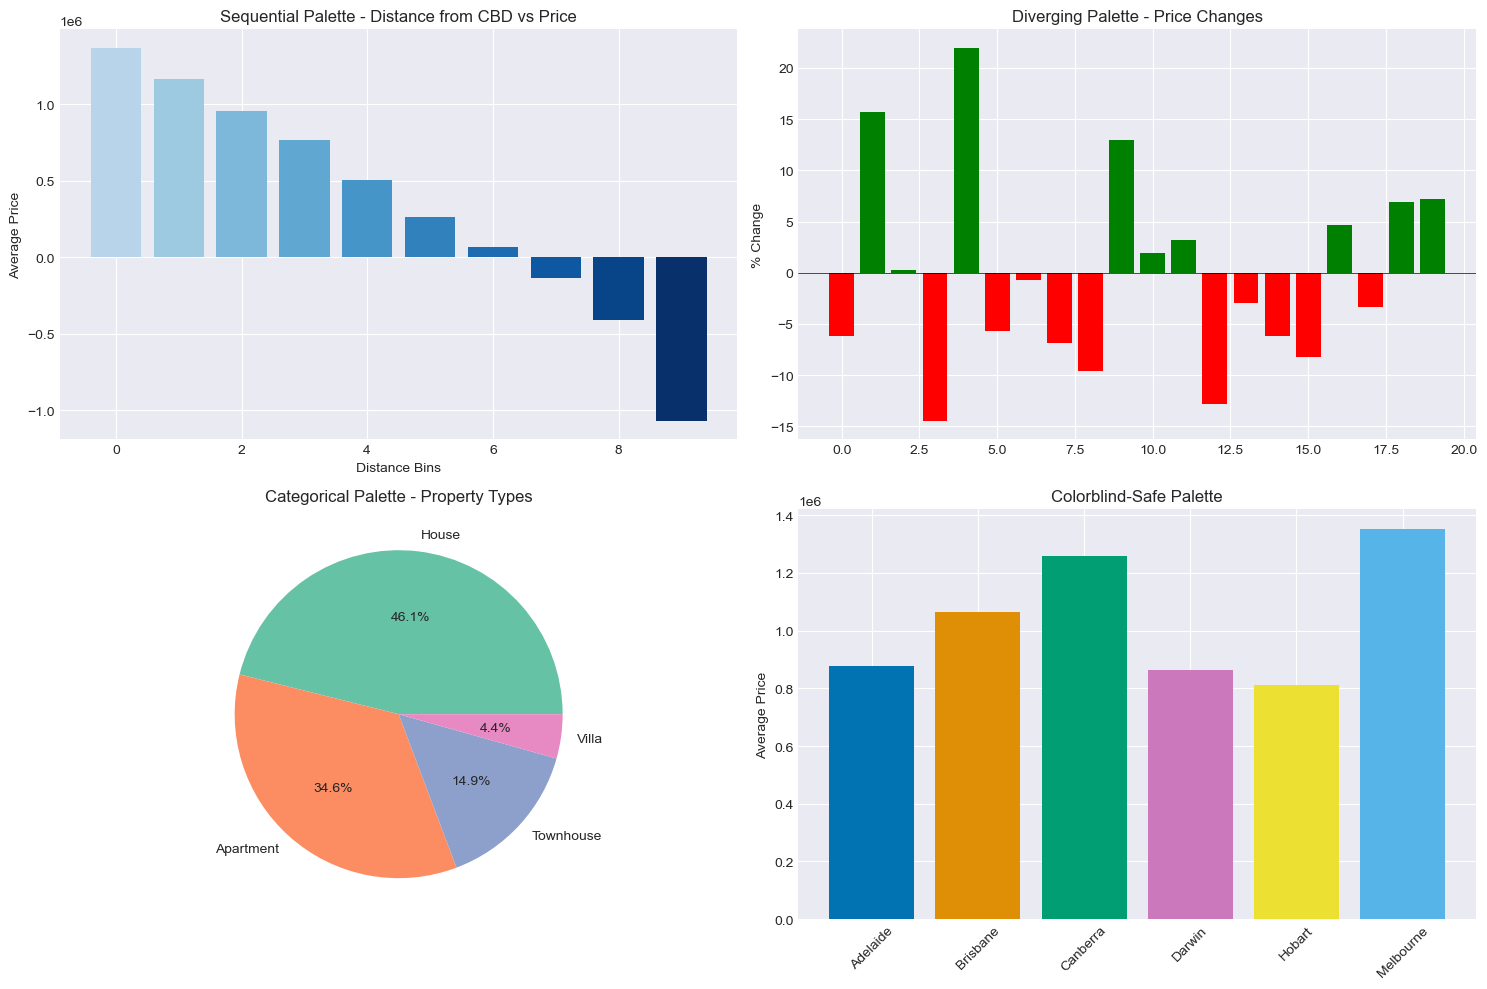

Color Guidelines:
✓ Sequential: Use for ordered/continuous data
✓ Diverging: Use when there's a meaningful midpoint (e.g., zero, average)
✓ Categorical: Use for unordered groups
✓ Always test for colorblind accessibility!


In [6]:
# Demonstrate different color palettes
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Sequential - for ordered data
price_by_distance = housing_data.groupby(pd.cut(housing_data['distance_cbd'], bins=10))['price'].mean()
colors_seq = plt.cm.Blues(np.linspace(0.3, 1, len(price_by_distance)))
axes[0, 0].bar(range(len(price_by_distance)), price_by_distance.values, color=colors_seq)
axes[0, 0].set_title('Sequential Palette - Distance from CBD vs Price')
axes[0, 0].set_xlabel('Distance Bins')
axes[0, 0].set_ylabel('Average Price')

# Diverging - for data with meaningful midpoint
price_change = np.random.normal(0, 10, 20)  # Simulate price changes
colors_div = ['red' if x < 0 else 'green' for x in price_change]
axes[0, 1].bar(range(len(price_change)), price_change, color=colors_div)
axes[0, 1].axhline(y=0, color='black', linestyle='-', linewidth=0.5)
axes[0, 1].set_title('Diverging Palette - Price Changes')
axes[0, 1].set_ylabel('% Change')

# Categorical - for unordered categories
property_counts = housing_data['property_type'].value_counts()
colors_cat = sns.color_palette('Set2', len(property_counts))
axes[1, 0].pie(property_counts.values, labels=property_counts.index, colors=colors_cat, autopct='%1.1f%%')
axes[1, 0].set_title('Categorical Palette - Property Types')

# Colorblind-safe palette
# Using colorblind-safe colors
cb_colors = ['#0173B2', '#DE8F05', '#029E73', '#CC78BC', '#ECE133', '#56B4E9']
city_avg = housing_data.groupby('city')['price'].mean().head(6)
axes[1, 1].bar(range(len(city_avg)), city_avg.values, color=cb_colors)
axes[1, 1].set_xticks(range(len(city_avg)))
axes[1, 1].set_xticklabels(city_avg.index, rotation=45)
axes[1, 1].set_title('Colorblind-Safe Palette')
axes[1, 1].set_ylabel('Average Price')

plt.tight_layout()
plt.show()

print("Color Guidelines:")
print("✓ Sequential: Use for ordered/continuous data")
print("✓ Diverging: Use when there's a meaningful midpoint (e.g., zero, average)")
print("✓ Categorical: Use for unordered groups")
print("✓ Always test for colorblind accessibility!")

## 4. Gestalt Principles in Data Visualization

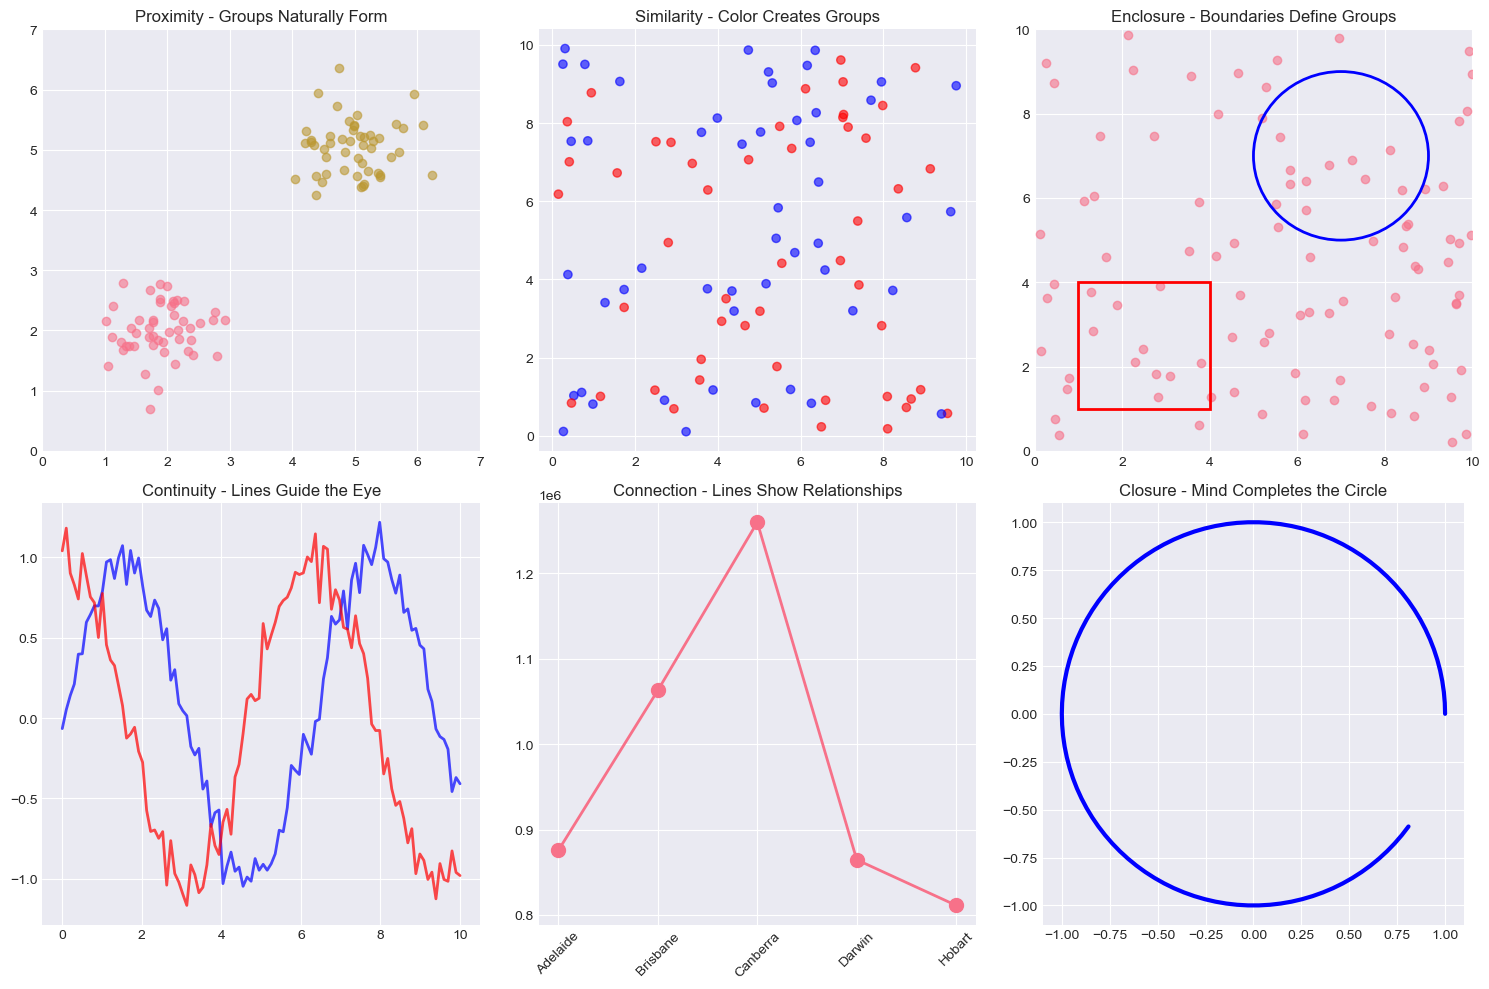

Gestalt Principles in Practice:
• Use proximity to group related data
• Use color/shape similarity to show categories
• Use enclosure for highlighting regions of interest
• Use continuity in line charts for trends
• Use connection to show relationships


In [7]:
# Demonstrate Gestalt principles
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Proximity - objects near each other are perceived as a group
np.random.seed(42)
group1_x = np.random.normal(2, 0.5, 50)
group1_y = np.random.normal(2, 0.5, 50)
group2_x = np.random.normal(5, 0.5, 50)
group2_y = np.random.normal(5, 0.5, 50)

axes[0, 0].scatter(group1_x, group1_y, alpha=0.6)
axes[0, 0].scatter(group2_x, group2_y, alpha=0.6)
axes[0, 0].set_title('Proximity - Groups Naturally Form')
axes[0, 0].set_xlim(0, 7)
axes[0, 0].set_ylim(0, 7)

# Similarity - similar objects are grouped
colors = ['red'] * 25 + ['blue'] * 25 + ['red'] * 25 + ['blue'] * 25
x = np.random.uniform(0, 10, 100)
y = np.random.uniform(0, 10, 100)
axes[0, 1].scatter(x, y, c=colors, alpha=0.6)
axes[0, 1].set_title('Similarity - Color Creates Groups')

# Enclosure - objects within a boundary are seen as a group
from matplotlib.patches import Rectangle, Circle
axes[0, 2].scatter(np.random.uniform(0, 10, 100), np.random.uniform(0, 10, 100), alpha=0.6)
rect = Rectangle((1, 1), 3, 3, fill=False, edgecolor='red', linewidth=2)
circle = Circle((7, 7), 2, fill=False, edgecolor='blue', linewidth=2)
axes[0, 2].add_patch(rect)
axes[0, 2].add_patch(circle)
axes[0, 2].set_title('Enclosure - Boundaries Define Groups')
axes[0, 2].set_xlim(0, 10)
axes[0, 2].set_ylim(0, 10)

# Continuity - we perceive smooth, continuous patterns
x = np.linspace(0, 10, 100)
y1 = np.sin(x) + np.random.normal(0, 0.1, 100)
y2 = np.cos(x) + np.random.normal(0, 0.1, 100)
axes[1, 0].plot(x, y1, 'b-', alpha=0.7, linewidth=2)
axes[1, 0].plot(x, y2, 'r-', alpha=0.7, linewidth=2)
axes[1, 0].set_title('Continuity - Lines Guide the Eye')

# Connection - connected objects are perceived as related
cities_sample = housing_data.groupby('city')['price'].mean().head(5)
x_pos = range(len(cities_sample))
axes[1, 1].plot(x_pos, cities_sample.values, 'o-', markersize=10, linewidth=2)
axes[1, 1].set_xticks(x_pos)
axes[1, 1].set_xticklabels(cities_sample.index, rotation=45)
axes[1, 1].set_title('Connection - Lines Show Relationships')

# Closure - we complete incomplete shapes
theta = np.linspace(0, 1.8 * np.pi, 100)
x_circle = np.cos(theta)
y_circle = np.sin(theta)
axes[1, 2].plot(x_circle, y_circle, 'b-', linewidth=3)
axes[1, 2].set_title('Closure - Mind Completes the Circle')
axes[1, 2].set_aspect('equal')

plt.tight_layout()
plt.show()

print("Gestalt Principles in Practice:")
print("• Use proximity to group related data")
print("• Use color/shape similarity to show categories")
print("• Use enclosure for highlighting regions of interest")
print("• Use continuity in line charts for trends")
print("• Use connection to show relationships")

## 5. Chart Selection Framework

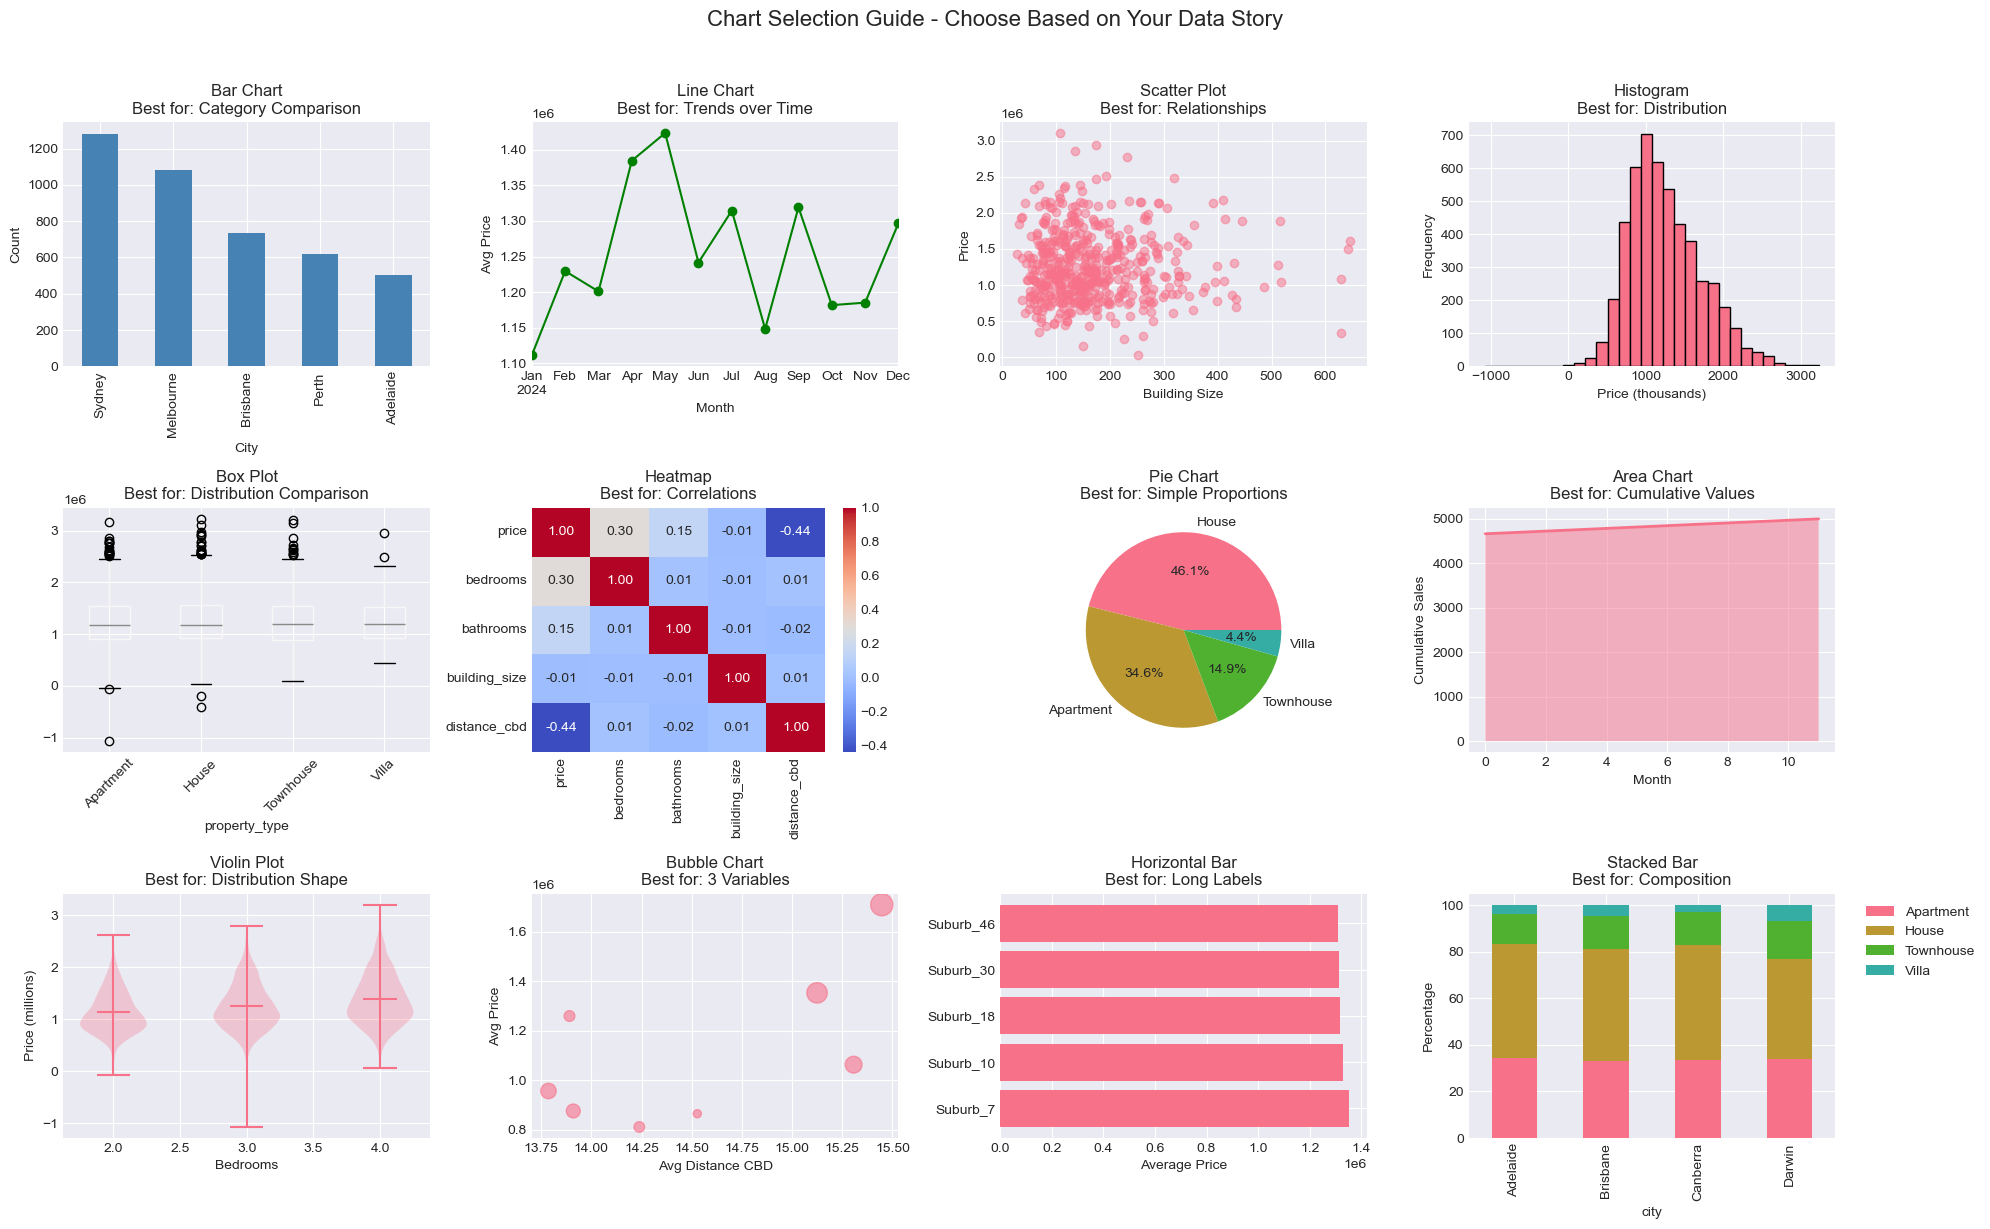

In [8]:
# Create a comprehensive comparison of chart types
fig = plt.figure(figsize=(20, 12))

# Sample data for demonstrations
sample_cities = housing_data['city'].value_counts().head(5)
sample_prices = housing_data.groupby('bedrooms')['price'].mean()
sample_time = housing_data.groupby(housing_data['sale_date'].dt.to_period('M'))['price'].mean().tail(12)

# 1. Bar Chart - Comparing categories
ax1 = plt.subplot(3, 4, 1)
sample_cities.plot(kind='bar', ax=ax1, color='steelblue')
ax1.set_title('Bar Chart\nBest for: Category Comparison')
ax1.set_xlabel('City')
ax1.set_ylabel('Count')

# 2. Line Chart - Showing trends
ax2 = plt.subplot(3, 4, 2)
sample_time.plot(kind='line', ax=ax2, marker='o', color='green')
ax2.set_title('Line Chart\nBest for: Trends over Time')
ax2.set_xlabel('Month')
ax2.set_ylabel('Avg Price')

# 3. Scatter Plot - Relationships
ax3 = plt.subplot(3, 4, 3)
ax3.scatter(housing_data['building_size'][:500], housing_data['price'][:500], alpha=0.5)
ax3.set_title('Scatter Plot\nBest for: Relationships')
ax3.set_xlabel('Building Size')
ax3.set_ylabel('Price')

# 4. Histogram - Distribution
ax4 = plt.subplot(3, 4, 4)
ax4.hist(housing_data['price']/1000, bins=30, edgecolor='black')
ax4.set_title('Histogram\nBest for: Distribution')
ax4.set_xlabel('Price (thousands)')
ax4.set_ylabel('Frequency')

# 5. Box Plot - Distribution comparison
ax5 = plt.subplot(3, 4, 5)
housing_data.boxplot(column='price', by='property_type', ax=ax5)
ax5.set_title('Box Plot\nBest for: Distribution Comparison')
plt.sca(ax5)
plt.xticks(rotation=45)

# 6. Heatmap - Correlation matrix
ax6 = plt.subplot(3, 4, 6)
corr_data = housing_data[['price', 'bedrooms', 'bathrooms', 'building_size', 'distance_cbd']].corr()
sns.heatmap(corr_data, annot=True, fmt='.2f', ax=ax6, cmap='coolwarm')
ax6.set_title('Heatmap\nBest for: Correlations')

# 7. Pie Chart - Part-to-whole (use sparingly)
ax7 = plt.subplot(3, 4, 7)
housing_data['property_type'].value_counts().plot(kind='pie', ax=ax7, autopct='%1.1f%%')
ax7.set_title('Pie Chart\nBest for: Simple Proportions')
ax7.set_ylabel('')

# 8. Area Chart - Cumulative trends
ax8 = plt.subplot(3, 4, 8)
cumulative_sales = housing_data.groupby(housing_data['sale_date'].dt.to_period('M')).size().cumsum().tail(12)
ax8.fill_between(range(len(cumulative_sales)), cumulative_sales.values, alpha=0.5)
ax8.plot(range(len(cumulative_sales)), cumulative_sales.values, linewidth=2)
ax8.set_title('Area Chart\nBest for: Cumulative Values')
ax8.set_xlabel('Month')
ax8.set_ylabel('Cumulative Sales')

# 9. Violin Plot - Distribution shape
ax9 = plt.subplot(3, 4, 9)
data_for_violin = [housing_data[housing_data['bedrooms']==i]['price'].values/1000000 
                   for i in [2, 3, 4]]
ax9.violinplot(data_for_violin, positions=[2, 3, 4], showmeans=True)
ax9.set_title('Violin Plot\nBest for: Distribution Shape')
ax9.set_xlabel('Bedrooms')
ax9.set_ylabel('Price (millions)')

# 10. Bubble Chart - 3 variables
ax10 = plt.subplot(3, 4, 10)
bubble_data = housing_data.groupby('city').agg({
    'price': 'mean',
    'distance_cbd': 'mean',
    'property_id': 'count'
}).reset_index()
ax10.scatter(bubble_data['distance_cbd'], bubble_data['price'], 
            s=bubble_data['property_id']/5, alpha=0.6)
ax10.set_title('Bubble Chart\nBest for: 3 Variables')
ax10.set_xlabel('Avg Distance CBD')
ax10.set_ylabel('Avg Price')

# 11. Horizontal Bar - Long labels
ax11 = plt.subplot(3, 4, 11)
top_suburbs = housing_data.groupby('suburb')['price'].mean().nlargest(5)
ax11.barh(range(len(top_suburbs)), top_suburbs.values)
ax11.set_yticks(range(len(top_suburbs)))
ax11.set_yticklabels(top_suburbs.index)
ax11.set_title('Horizontal Bar\nBest for: Long Labels')
ax11.set_xlabel('Average Price')

# 12. Stacked Bar - Composition over categories
ax12 = plt.subplot(3, 4, 12)
stacked_data = pd.crosstab(housing_data['city'], housing_data['property_type'], normalize='index') * 100
stacked_data.iloc[:4].plot(kind='bar', stacked=True, ax=ax12)
ax12.set_title('Stacked Bar\nBest for: Composition')
ax12.set_ylabel('Percentage')
ax12.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.suptitle('Chart Selection Guide - Choose Based on Your Data Story', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

**Exercise 2 — Create a Data Story (hard)**  
Using the housing data, create a 3-panel visualization that tells a story about market trends.


In [9]:
# Your turn


<details>
<summary><b>Solution</b></summary>

```python
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Story: "The Sydney-Melbourne Property Divide"

# Panel 1: Price comparison
syd_mel = housing_data[housing_data['city'].isin(['Sydney', 'Melbourne'])]
syd_mel.boxplot(column='price', by='city', ax=axes[0])
axes[0].set_title('Panel 1: Price Gap\nSydney commands 25% premium')
axes[0].set_ylabel('Price ($)')

# Panel 2: Property type preferences
prop_types = pd.crosstab(syd_mel['city'], syd_mel['property_type'], normalize='index') * 100
prop_types.T.plot(kind='bar', ax=axes[1])
axes[1].set_title('Panel 2: Living Preferences\nMelbourne favors houses, Sydney apartments')
axes[1].set_ylabel('Percentage (%)')
axes[1].set_xlabel('Property Type')
axes[1].legend(title='City')

# Panel 3: Price trends over time
monthly_avg = syd_mel.groupby([syd_mel['sale_date'].dt.to_period('Q'), 'city'])['price'].mean().unstack()
monthly_avg.plot(ax=axes[2], marker='o')
axes[2].set_title('Panel 3: Diverging Trends\nGap widening over time')
axes[2].set_ylabel('Average Price ($)')
axes[2].set_xlabel('Quarter')
axes[2].legend(title='City')

plt.suptitle('The Sydney-Melbourne Property Divide: A Growing Gap', fontsize=14, y=1.05)
plt.tight_layout()
plt.show()

print("Story Summary:")
print("1. Sydney properties cost 25% more on average")
print("2. Different lifestyle preferences drive property types")
print("3. The price gap is widening over time")
```
</details>

## 6. Common Pitfalls and How to Avoid Them

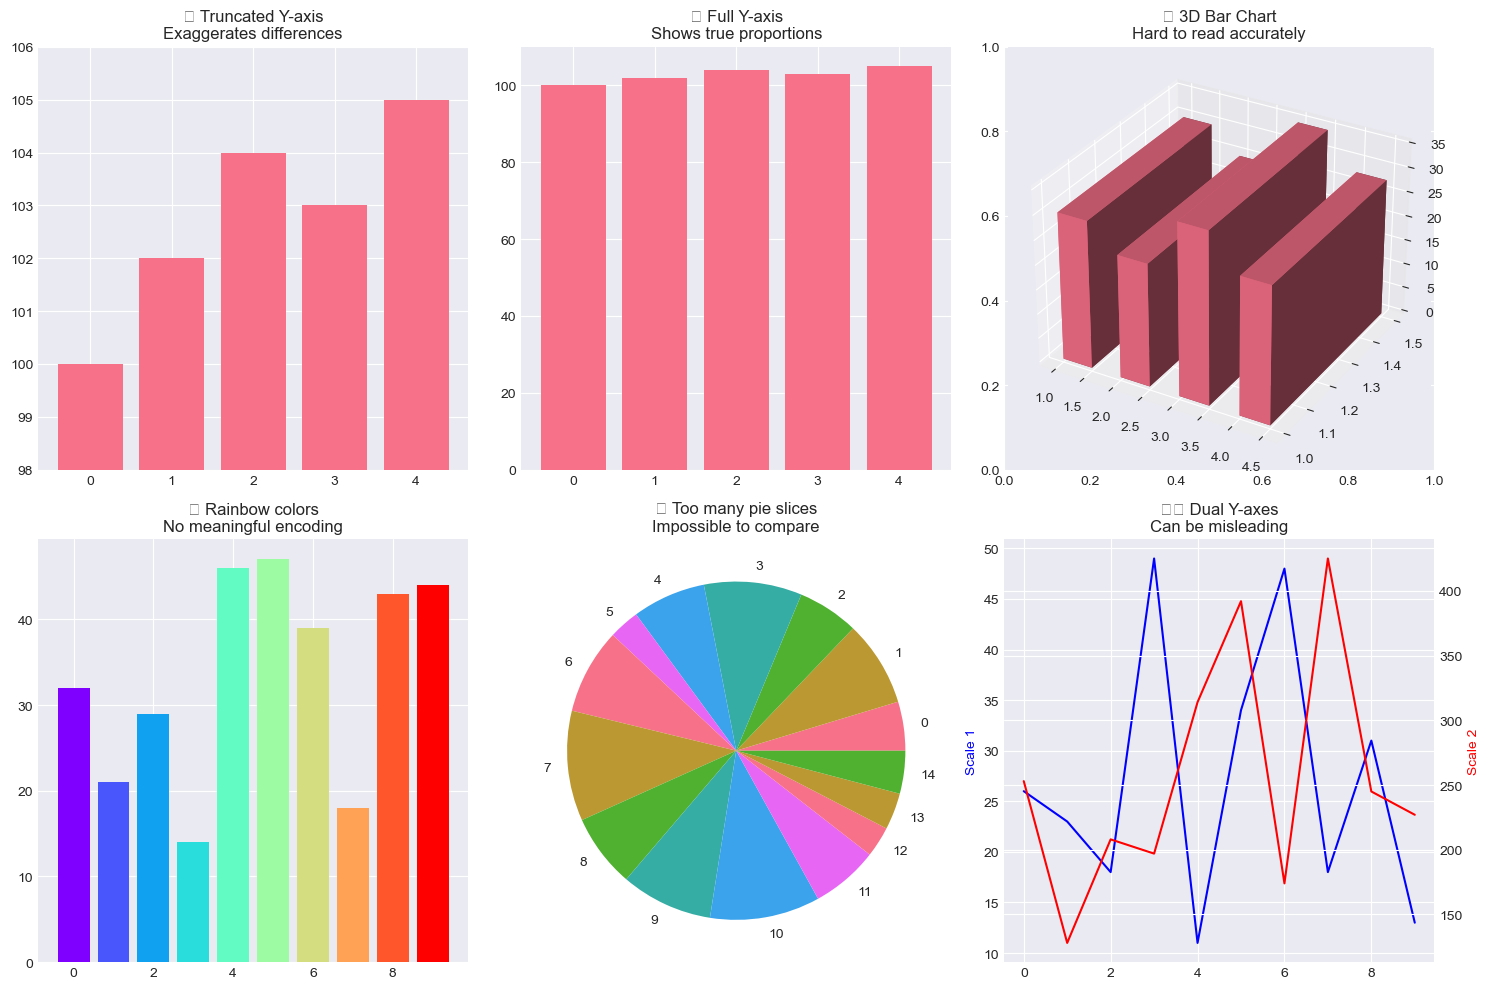

Visualization Don'ts:
❌ Don't truncate axes to exaggerate differences
❌ Avoid 3D charts unless absolutely necessary
❌ Don't use colors without meaning
❌ Avoid pie charts with >5 categories
⚠️  Use dual axes very carefully - they can mislead


In [10]:
# Demonstrate common visualization mistakes
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Pitfall 1: Truncated Y-axis
data_example = [100, 102, 104, 103, 105]
axes[0, 0].bar(range(5), data_example)
axes[0, 0].set_ylim(98, 106)
axes[0, 0].set_title('❌ Truncated Y-axis\nExaggerates differences')

axes[0, 1].bar(range(5), data_example)
axes[0, 1].set_ylim(0, 110)
axes[0, 1].set_title('✓ Full Y-axis\nShows true proportions')

# Pitfall 2: 3D charts
ax = plt.subplot(2, 3, 3, projection='3d')
ax.bar3d([1, 2, 3, 4], [1, 1, 1, 1], [0, 0, 0, 0], 
         [0.5, 0.5, 0.5, 0.5], [0.5, 0.5, 0.5, 0.5], [30, 25, 35, 28])
ax.set_title('❌ 3D Bar Chart\nHard to read accurately')

# Pitfall 3: Too many colors
random_colors = plt.cm.rainbow(np.linspace(0, 1, 10))
axes[1, 0].bar(range(10), np.random.randint(10, 50, 10), color=random_colors)
axes[1, 0].set_title('❌ Rainbow colors\nNo meaningful encoding')

# Pitfall 4: Pie chart with many categories
axes[1, 1].pie(np.random.randint(5, 20, 15), labels=range(15))
axes[1, 1].set_title('❌ Too many pie slices\nImpossible to compare')

# Pitfall 5: Dual Y-axes (use carefully)
ax1 = axes[1, 2]
ax2 = ax1.twinx()
ax1.plot(range(10), np.random.randint(10, 50, 10), 'b-')
ax2.plot(range(10), np.random.randint(100, 500, 10), 'r-')
ax1.set_ylabel('Scale 1', color='b')
ax2.set_ylabel('Scale 2', color='r')
axes[1, 2].set_title('⚠️ Dual Y-axes\nCan be misleading')

plt.tight_layout()
plt.show()

print("Visualization Don'ts:")
print("❌ Don't truncate axes to exaggerate differences")
print("❌ Avoid 3D charts unless absolutely necessary")
print("❌ Don't use colors without meaning")
print("❌ Avoid pie charts with >5 categories")
print("⚠️  Use dual axes very carefully - they can mislead")

## 7. Mini-Challenges

In [11]:
# Challenge setup
print("Mini-Challenges:")
print("="*50)
print("M1 (easy): Create a bar chart showing top 5 most expensive suburbs")
print("M2 (medium): Design a small multiple showing price distributions by city")
print("M3 (hard): Build a dashboard-style figure with 4+ coordinated views")
print("\nUse the housing_data DataFrame for all challenges")

# Your solutions here:


Mini-Challenges:
M1 (easy): Create a bar chart showing top 5 most expensive suburbs
M2 (medium): Design a small multiple showing price distributions by city
M3 (hard): Build a dashboard-style figure with 4+ coordinated views

Use the housing_data DataFrame for all challenges


<details>
<summary><b>Solutions</b></summary>

```python
# M1 - Top 5 suburbs
top_suburbs = housing_data.groupby('suburb')['price'].mean().nlargest(5)
plt.figure(figsize=(10, 6))
top_suburbs.plot(kind='bar', color='steelblue')
plt.title('Top 5 Most Expensive Suburbs')
plt.ylabel('Average Price ($)')
plt.xlabel('Suburb')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# M2 - Small multiples
cities_to_plot = housing_data['city'].value_counts().head(6).index
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.ravel()

for i, city in enumerate(cities_to_plot):
    city_data = housing_data[housing_data['city'] == city]['price']
    axes[i].hist(city_data/1000000, bins=20, edgecolor='black', alpha=0.7)
    axes[i].set_title(f'{city}')
    axes[i].set_xlabel('Price (millions)')
    axes[i].set_ylabel('Frequency')
    axes[i].axvline(city_data.mean()/1000000, color='red', linestyle='--', label='Mean')
    axes[i].legend()

plt.suptitle('Price Distributions by City', fontsize=14)
plt.tight_layout()
plt.show()

# M3 - Dashboard
fig = plt.figure(figsize=(20, 12))

# 1. Map-like overview (using scatter)
ax1 = plt.subplot(2, 3, 1)
city_stats = housing_data.groupby('city').agg({
    'price': 'mean',
    'property_id': 'count'
}).reset_index()
scatter = ax1.scatter(range(len(city_stats)), city_stats['price'], 
                     s=city_stats['property_id']/5, alpha=0.6)
ax1.set_xticks(range(len(city_stats)))
ax1.set_xticklabels(city_stats['city'], rotation=45)
ax1.set_title('City Overview: Price vs Volume')
ax1.set_ylabel('Average Price')

# 2. Time series
ax2 = plt.subplot(2, 3, 2)
monthly = housing_data.groupby(housing_data['sale_date'].dt.to_period('M'))['price'].mean()
monthly.plot(ax=ax2, color='green', marker='o')
ax2.set_title('Price Trend Over Time')
ax2.set_ylabel('Average Price')

# 3. Property type breakdown
ax3 = plt.subplot(2, 3, 3)
prop_type_stats = housing_data.groupby('property_type')['price'].mean().sort_values()
ax3.barh(range(len(prop_type_stats)), prop_type_stats.values)
ax3.set_yticks(range(len(prop_type_stats)))
ax3.set_yticklabels(prop_type_stats.index)
ax3.set_title('Average Price by Property Type')
ax3.set_xlabel('Price ($)')

# 4. Correlation heatmap
ax4 = plt.subplot(2, 3, 4)
corr = housing_data[['price', 'bedrooms', 'bathrooms', 'distance_cbd', 'age']].corr()
sns.heatmap(corr, annot=True, ax=ax4, cmap='RdBu_r', center=0)
ax4.set_title('Feature Correlations')

# 5. Distribution
ax5 = plt.subplot(2, 3, 5)
ax5.hist(housing_data['price']/1000000, bins=30, edgecolor='black', alpha=0.7)
ax5.axvline(housing_data['price'].mean()/1000000, color='red', linestyle='--', linewidth=2)
ax5.set_title('Price Distribution')
ax5.set_xlabel('Price (millions)')
ax5.set_ylabel('Frequency')

# 6. Key metrics
ax6 = plt.subplot(2, 3, 6)
ax6.axis('off')
metrics_text = f"""
MARKET OVERVIEW
{'='*30}
Total Properties: {len(housing_data):,}
Average Price: ${housing_data['price'].mean():,.0f}
Median Price: ${housing_data['price'].median():,.0f}
Price Range: ${housing_data['price'].min():,.0f} - ${housing_data['price'].max():,.0f}

Most Common Type: {housing_data['property_type'].mode()[0]}
Most Expensive City: {housing_data.groupby('city')['price'].mean().idxmax()}
Average Age: {housing_data['age'].mean():.1f} years
"""
ax6.text(0.1, 0.5, metrics_text, fontsize=12, family='monospace',
        verticalalignment='center')

plt.suptitle('Housing Market Dashboard', fontsize=16)
plt.tight_layout()
plt.show()
```
</details>

In [1]:
list1 = [1,2,3,4,5]
list1>2

TypeError: '>' not supported between instances of 'list' and 'int'

## Wrap-Up
✅ You understand visual encoding principles  
✅ You can choose appropriate colors and palettes  
✅ You know how to select the right chart for your data  
✅ You can avoid common visualization pitfalls  

**Next:** Interactive visualizations with Plotly and advanced techniques!
